Mojtaba Aprouz 

IMAGE PROCESSING

Diagnosis of FLAT FOOT disease

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening

In [25]:
def preprocess(path):
  """
  Input: Image path
  Output: Preprocessed image
  This function get path of image file 
  Load the image and the resize images to same size.  Threshold function from cv2 clearly separates feet and background 
  """
  image=cv2.imread(path,0)
  image=cv2.resize(image, (400, 320),interpolation = cv2.INTER_AREA)
  image=np.array(image)
  #image=1-image
  bin_img=cv2.threshold(image,70,255,cv2.THRESH_BINARY)[1]
  kernel= np.ones((7,7))
  fin_img= binary_opening(bin_img,kernel)
  fin_img= binary_closing(fin_img,kernel)
  img_u8 = fin_img.astype(np.uint8)
  return img_u8


In [26]:
def rotate(image):
  """
  Input: Image
  Output: well rotated image , The lowest point of the foot
  This finction rotate the foot image to put the sole of the foot on a straight line.
  By rotating the image by 1 degree and comparing the left and right part of the image.
  """
  center=(w/2,h/2)
  for i in range(0,20):
    angle = i
    scale = 1

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    left=rotated.copy()
    right=rotated.copy()
    left[:,int(w/3):]=0
    right[:,:int(2*w/3)]=0

    wmin,Hmin,wm,hm=cv2.boundingRect(left)
    wmin2,Hmin2,wm2,hm2=cv2.boundingRect(right)
    lefti=Hmin+hm
    righti=Hmin2+hm2
    if (np.abs(lefti-righti))<=2:
      break
  return rotated,lefti

In [27]:

def diagnosis(image,lowest_point):
  """
  Input: Image , The lowest point of the foot
  Output: Prints The result of flat foot diagnosis
  This function detects FLAT FOOT by comparing the lowest point and the middle part of the sole of the foot
  """
  flat=1
  for i in range(int(w/3),int(2*w/3),10):
    mid=image.copy()
    mid[:,i+10:]=0
    mid[:,:i]=0
    wmin_mid,Hmin_mid,wm_mid,hm_mid=cv2.boundingRect(mid)
    midi=Hmin_mid+hm_mid
    if lowest_point-midi > 5:
      print("### Flat foot disorder *WAS NOT* diagnosed ###\n\n")
      flat=0
      break

  if flat==1:
    print("### FLAT foot disorder *WAS* diagnosed ###\n\n")

### Flat foot disorder *WAS NOT* diagnosed ###




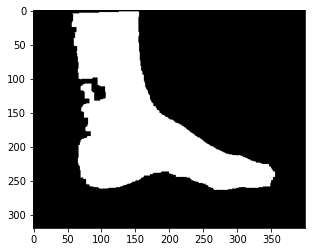

In [23]:
file="/content/sample_data/foot.jfif"
processed_img=preprocess(file)
(h, w) = processed_img.shape[:2]
rotated,left=rotate(processed_img)
diagnosis(rotated,left)
plt.imshow(rotated,cmap='gray');

### FLAT foot disorder *WAS* recogonized ###




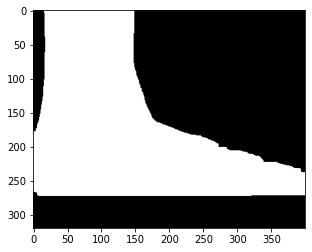

In [ ]:
file="/content/sample_data/PiedPlatDiscover.webp"
processed_img=preprocess(file)
(h, w) = processed_img.shape[:2]
rotated,left=rotate(processed_img)
diagnosis(rotated,left)
plt.imshow(rotated,cmap='gray');

### Flat foot disorder *WAS NOT* diagnosed ###




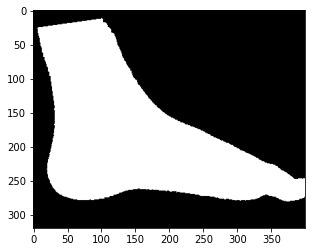

In [ ]:
file="/content/sample_data/Side_of_foot.jfif"
processed_img=preprocess(file)
(h, w) = processed_img.shape[:2]
rotated,left=rotate(processed_img)
diagnosis(rotated,left)
plt.imshow(rotated,cmap='gray');